# Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»



In [1]:
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy as sp
import numpy as np

In [2]:
from os.path import dirname, join as pjoin
data_dir = pjoin(dirname(sp.io.__file__))

# Занятие 1. ДПФ и спектральный анализ.

## Задача 1.1.  Частотная ось ДПФ.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello1.wav' | 'cello2.wav' | 'glockenspiel.wav' | 'vibraphone1.wav' | 'clarinet.wav' | 'guitar.wav' |

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello3.wav' | 'cello4.wav' | 'tuning-fork.wav' | 'vibraphone2.wav' | 'flute.wav' | 'wine-glass.wav' |




Считайте отсчеты дискретного сигнала $x[k]$, содержащегося в аудиофайле Вашего варианта. 

1) Выберите $y[k]$ — часть информативной области сигнала $x[k]$ длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.  

2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала $y[k]$. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент. 

3) выведите график сигнала $y[k]$ в области, где наблюдается колебание. По графику оцените период этого колебания $T_0$. Сравните частоту $f_0=1/ T_0$ с частотами основных гармоник из п.2.



In [3]:
samplerate, data = sp.io.wavfile.read ('flute.wav')

plt.figure(figsize=(12,8))
plt.xticks (np.linspace (0, 256 / samplerate, 16).round(4))
plt.plot (np.linspace (0, 256, 256) / samplerate, data[100000: 100000 + 2 ** 8])

plt.figure(figsize=(12,8))
plt.xticks (np.linspace (-0.0625 * samplerate, 0.0625 * samplerate, 20))
if data.shape[0] <= 2 ** 14:
    np.append (data, np.zeros(2 ** 14 - data.shape[0]))
else:
    data = data[100000: 100000 + 2 ** 14]

print (data.shape[0])

spectrum = np.absolute( sp.fft.fftshift(sp.fft.fft (data)))
spectrum /= spectrum.shape[0]

plt.plot (np.linspace (-0.0625, 0.0625, 2048) * samplerate, spectrum[7168:9216])
print (samplerate)
print (np.linspace (0, 1, data.shape[0]) / samplerate)

FileNotFoundError: [Errno 2] No such file or directory: 'flute.wav'

## Задача 1.2. Задача распознавания спектральных компонент. 

Считайте последовательность $x[k]$ из файла Вашего варианта (`variant_Nv_ex_1_2.npy`, где `Nv` — номер варианта). Известно, что ее аналитическая запись  имеет вид 

$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$


где $N$ — длина последовательности, $M<(N-1)/2$, относительные частоты гармонических компонент совпадают с бинами ДПФ. Определите число компонент,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.


A_m = 2.0 	 phi_m =  -45.0
A_m = 16.0 	 phi_m =  -60.0
A_m = 7.0 	 phi_m =  -150.0


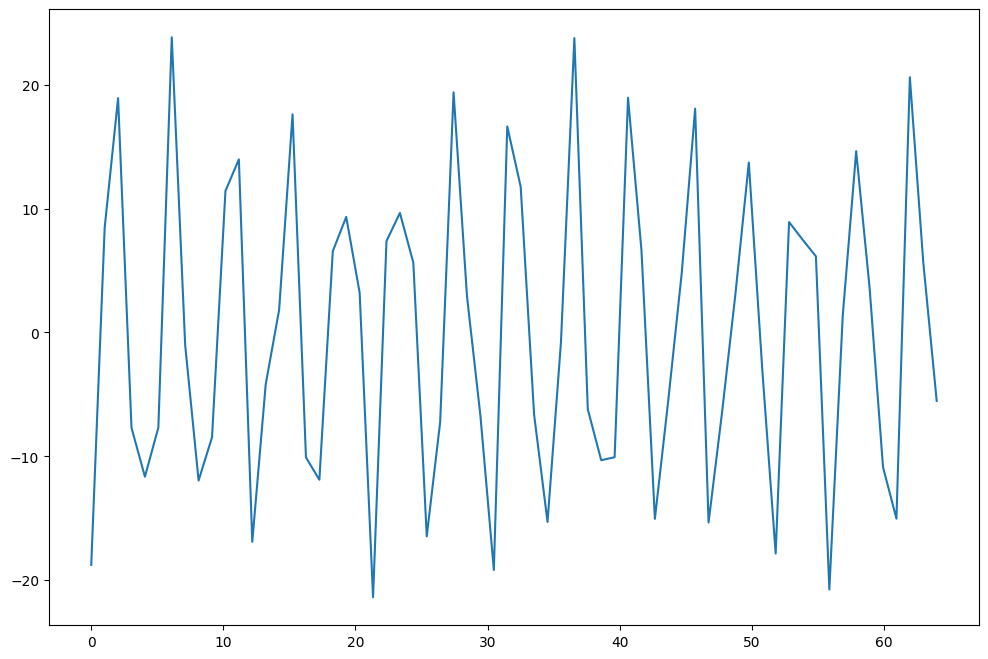

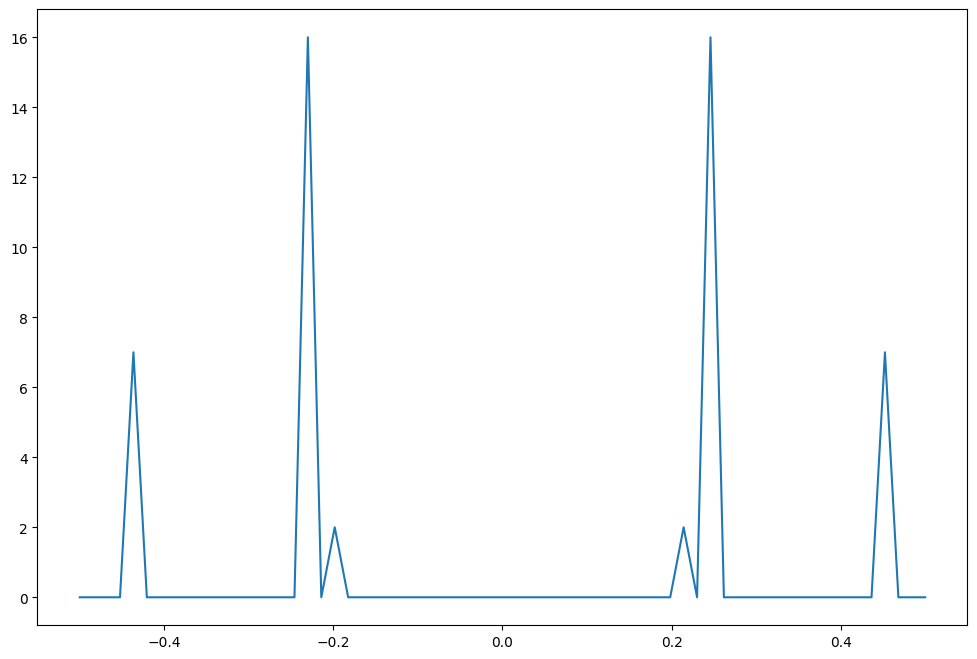

In [ ]:
Nv=11
x = np.load('variant_%i_ex_1_2.npy' %Nv )
spectrum = sp.fft.fftshift(sp.fft.fft (x))
spabs = (2 * np.absolute (spectrum) / spectrum.shape[0]).round(5)
sphase = (np.angle (spectrum * np.exp (np.pi * 1j / 2)) / np.pi * 180).round(5)

plt.figure(figsize=(12,8))
plt.plot (np.linspace (0, x.shape[0], x.shape[0]), x)

plt.figure(figsize=(12,8))
plt.plot (np.linspace (-0.5, 0.5, spabs.shape[0]), spabs)

for i in range (sphase.shape[0]//2, sphase.shape[0]):
    if spabs[i] > 2 ** (-10):
        print ('A_m =', spabs[i], '\t phi_m = ', sphase[i])

# Занятие 2. Окна в спектральном анализе.

## Задача 2.1. Исследование характеристик различных окон.
Рассмотрите следующие окна для ДПФ длиной в $N=20+2N_v$, где $N_v $ — номер Вашего варианта:

1) прямоугольное (`boxcar`),

2) Бартлетта (`bartlett`),

3) Ханна (`hann`),

4) Хэмминга (`hamming`),

5) Блэкмана (`blackman`),

6) окно с плоской вершиной (`flattop`).

Постройте графики для окон во временной области, амплитудно-частотной характеристики окон в линейном масштабе и в дБ. По графикам для каждого окна оцените следующие параметры:

* ширину $\Delta \nu$ главного лепестка на уровне половинной мощности,

* максимальный уровень боковых лепестков относительно главного в дБ,

* асимптотическую скорость спада боковых лепестков в дБ/октава. 

Составьте таблицу с результатами. 


/tmp/ipykernel_1403/1695808999.py:70: RuntimeWarning: divide by zero encountered in log10
  ax[2].plot (np.linspace (-0.5, 0.5, Nspectrum), 20 * np.log10 (spec / specmax))


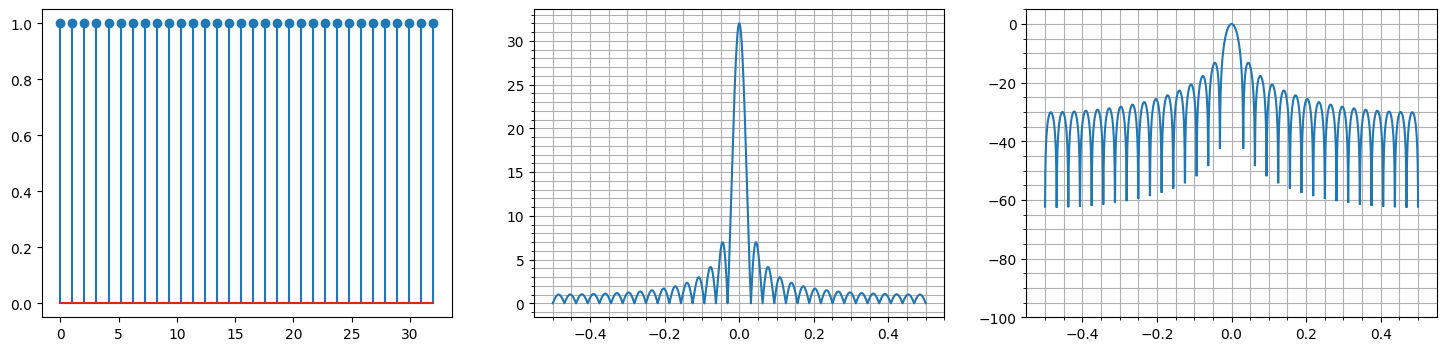

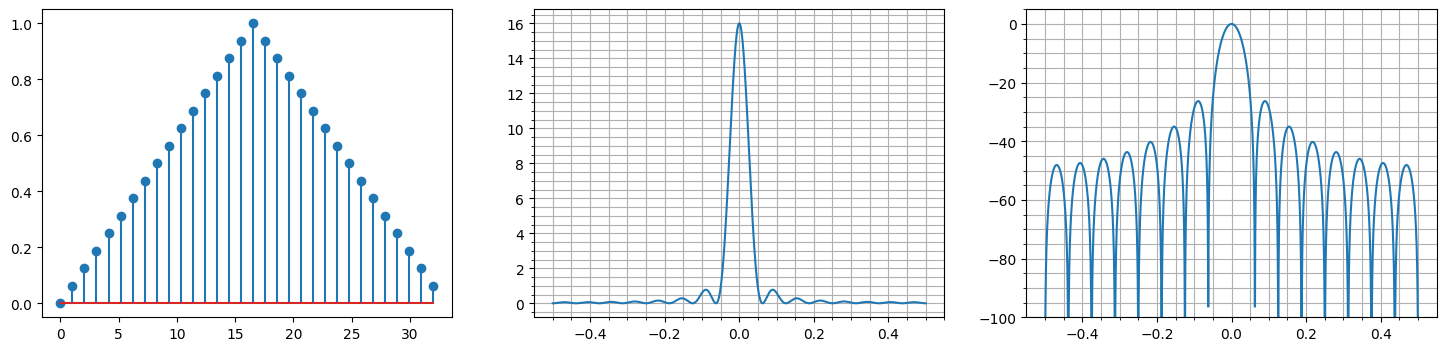

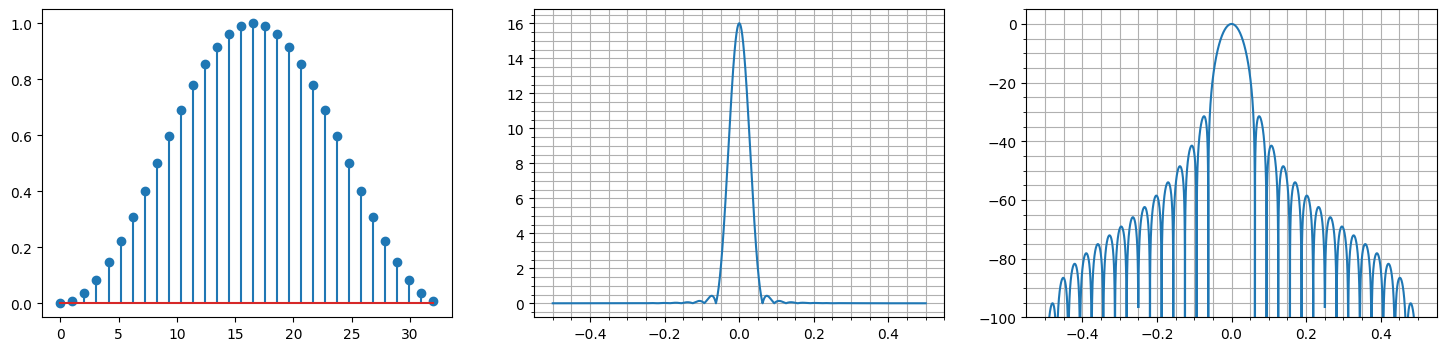

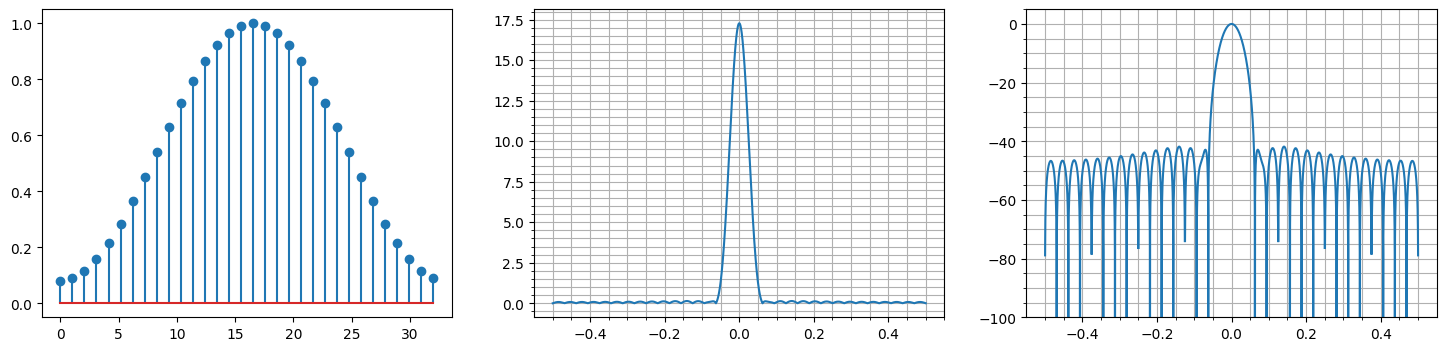

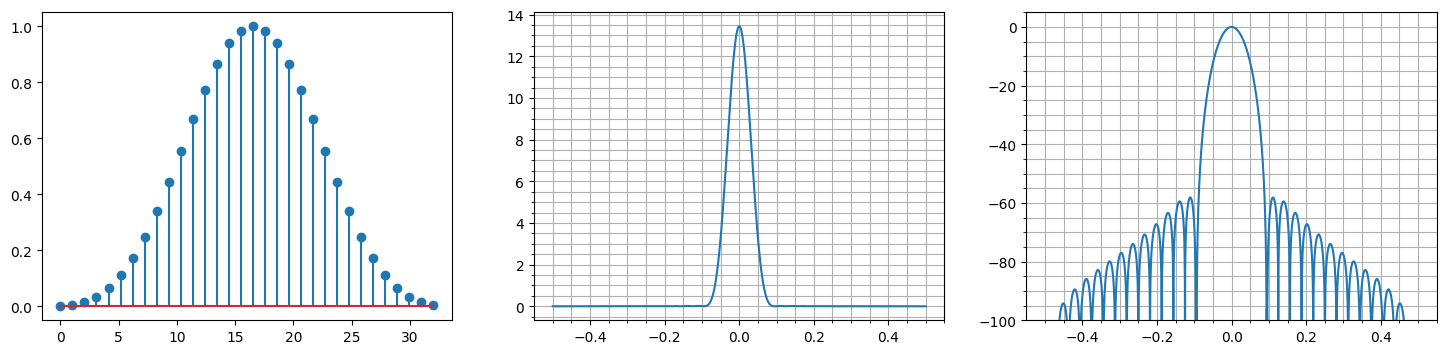

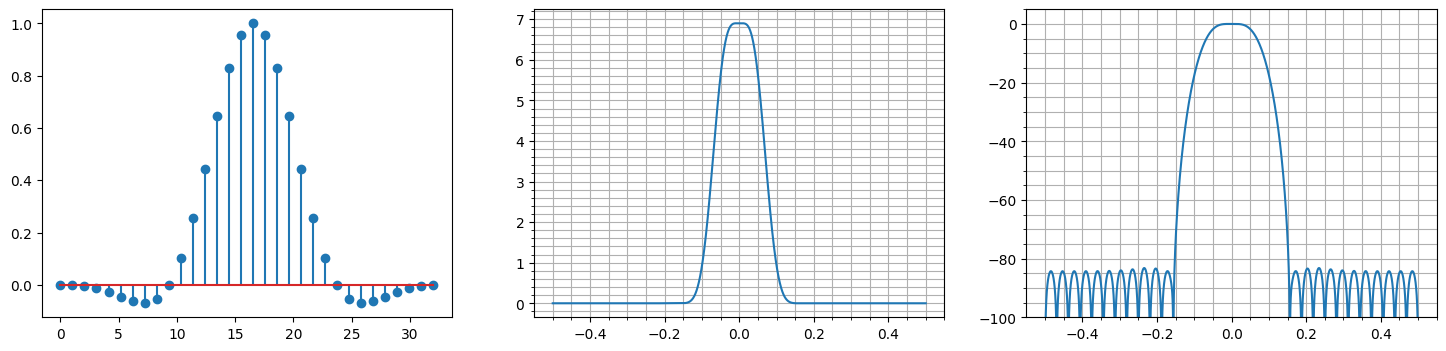

In [ ]:
flatc = [0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368]


def boxcar (N, t, a = 1):
    if t < N and t >= 0:
        return a
    else:
        return 0

def bartlett (N, t, a = 1):
    if t < N and t >= 0:
        return a * (1 - 2/N * np.abs (t - N // 2))
    else:
        return 0

def hann (N, t, a = 1):
    if t < N and t >= 0:
        return a/2 * (1 - np.cos (2 * np.pi * t / N))
    else:
        return 0

def hamming (N, t, a = 1):
    if t < N and t >= 0:
        return a * (0.54 - 0.46 * np.cos (2 * np.pi * t / N))
    else:
        return 0

def blackman (N, t, a = 1):
    if t < N and t >= 0:
        return a * (0.42 - 0.5 * np.cos (2 * np.pi * t / N) + 0.08 * np.cos (4 * np.pi * t / N))
    else:
        return 0

def flattop (N, t, a = 1):
    if t < N and t >= 0:
        s = 0
        for i in range (0, 5):
            s += (-1) ** i * flatc[i] * np.cos (2 * np.pi * i * t / N)
        return s * a
    else:
        return 0


def drawFunc (N, windowfunc, p1 = None, p2 = None):
    Nspectrum = N * 128
    tarr = np.linspace (0, Nspectrum, Nspectrum, dtype=np.int32)
    xarray = np.zeros(Nspectrum)
    spec = np.zeros(Nspectrum)

    if p2 != None:
        for i in range (Nspectrum):
            xarray[i] = windowfunc (N, tarr[i], p1, p2)
    elif p1 != None:
        for i in range (Nspectrum):
            xarray[i] = windowfunc (N, tarr[i], p1)
    else:
        for i in range (Nspectrum):
            xarray[i] = windowfunc (N, tarr[i])

    spec = sp.fft.fft (xarray)
    specmax = np.absolute(spec[0])
    spec = np.absolute (sp.fft.fftshift (spec))

    fig, ax = plt.subplots(1, 3, figsize = (18, 4))

    ax[0].stem (np.linspace (0, N, N), xarray[0:N])
    ax[1].plot (np.linspace (-0.5, 0.5, Nspectrum), spec)
    ax[1].grid (axis='both', which='both', visible=True)
    ax[1].minorticks_on ()
    ax[2].plot (np.linspace (-0.5, 0.5, Nspectrum), 20 * np.log10 (spec / specmax))
    ax[2].set_ylim (-100,5)
    ax[2].grid (axis='both', which='both', visible=True)
    ax[2].minorticks_on ()

drawFunc (32, boxcar)
drawFunc (32, bartlett)
drawFunc (32, hann)
drawFunc (32, hamming)
drawFunc (32, blackman)
drawFunc (32, flattop)

## Задача 2.2. Окно Кайзера.
Повторите вычисления задачи 2.1 для окна Кайзера с параметром $\beta =0;\ \ 5;\ \ 6;\ \ 8,6$. Сравните полученные результаты с предыдущей задачей. 


/tmp/ipykernel_1403/1695808999.py:70: RuntimeWarning: divide by zero encountered in log10
  ax[2].plot (np.linspace (-0.5, 0.5, Nspectrum), 20 * np.log10 (spec / specmax))


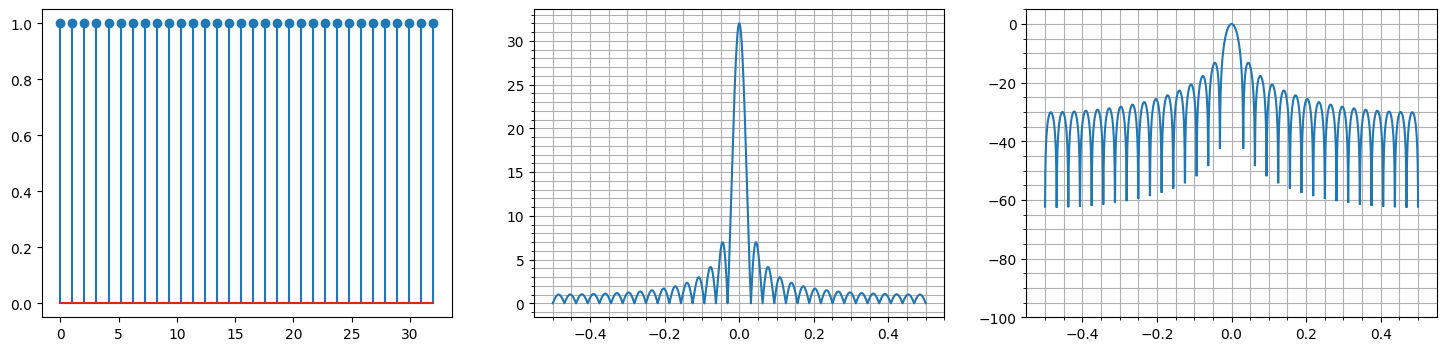

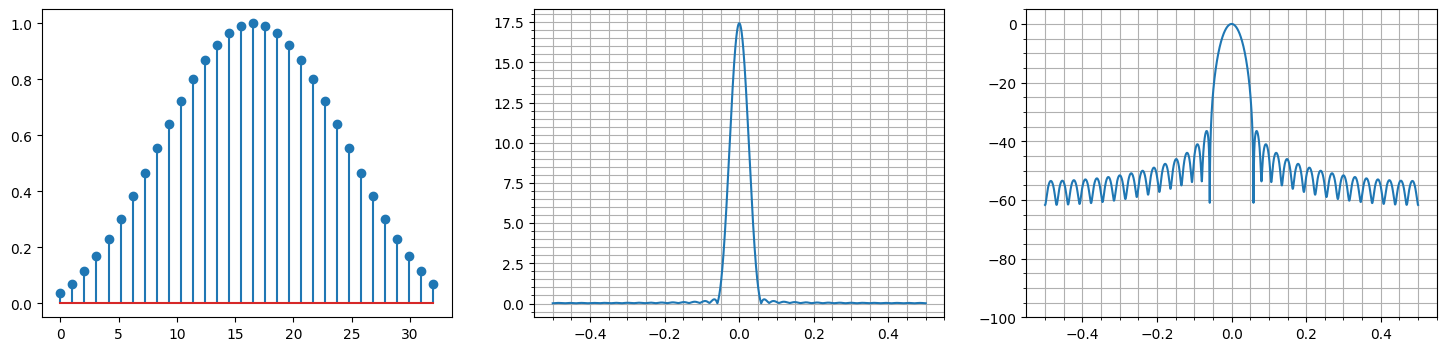

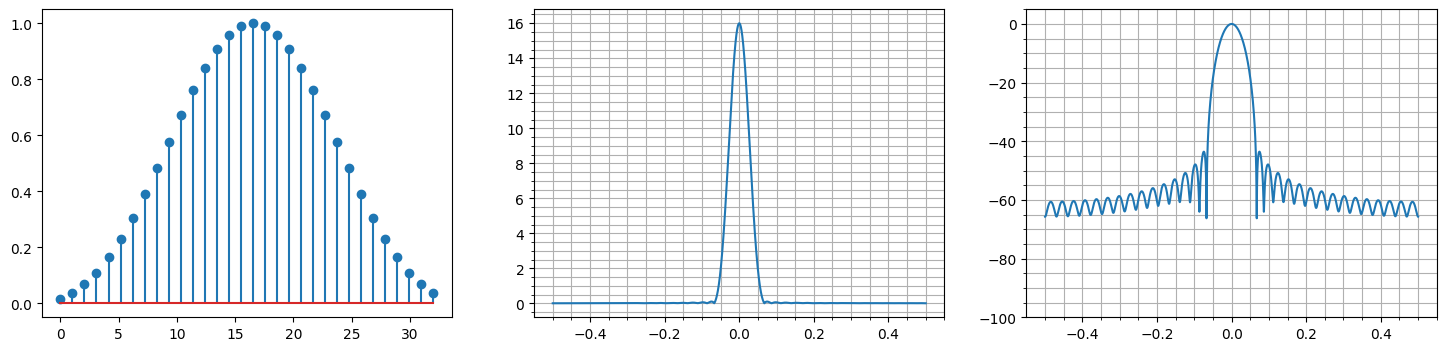

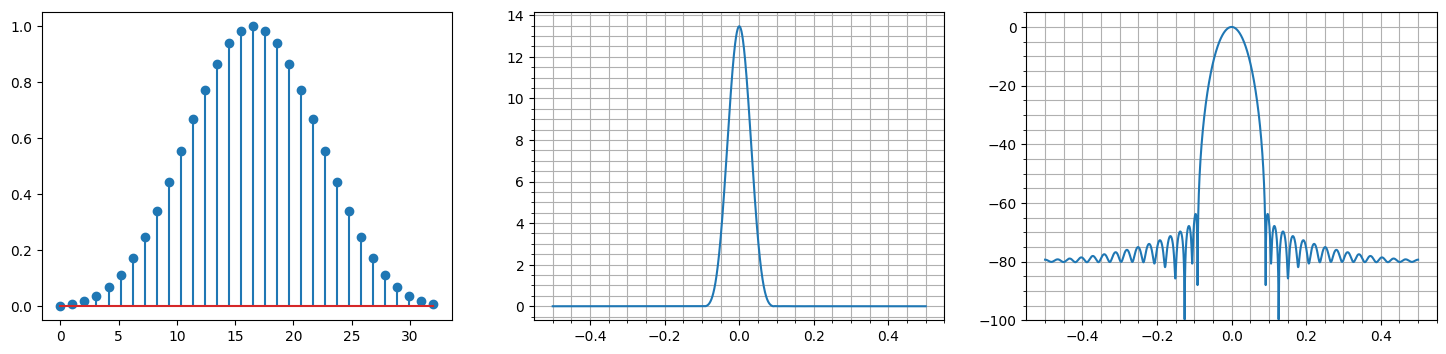

In [ ]:


def kaiser (N, t, b = 0, a = 1):
    if t < N and t >= 0:
        M = N + 1
        return a * (np.kaiser (M,b))[t]
    else:
        return 0

drawFunc (32, kaiser, 0)
drawFunc (32, kaiser, 5)
drawFunc (32, kaiser, 6)
drawFunc (32, kaiser, 8.6)

## Задача 2.3. Окно Чебышева.
Получите окно Чебышева для четырех уровней боковых лепестков, которые получились в задаче 2.2. Сравните ширину главного лепестка на уровне половинной мощности с результатами предыдущих задач. 


/home/lev/.local/lib/python3.8/site-packages/scipy/signal/windows/_windows.py:1543: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


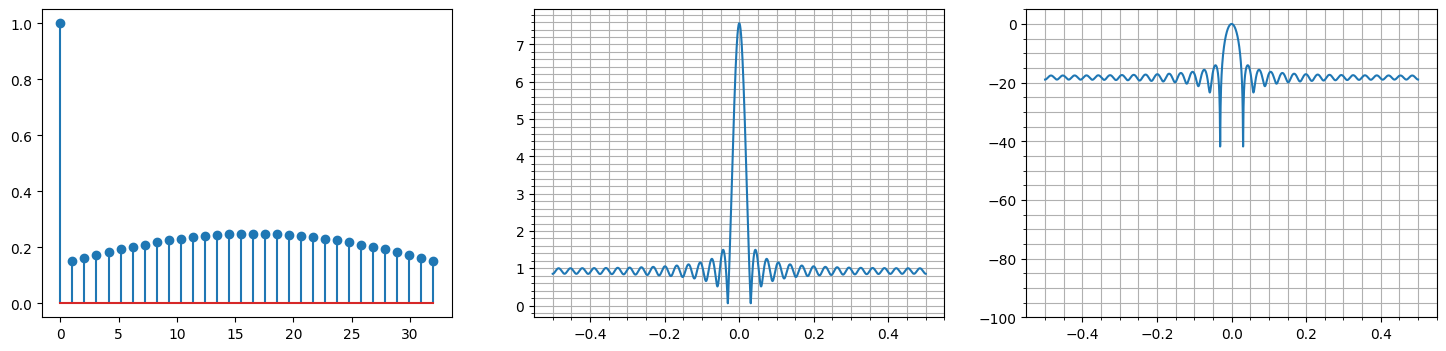

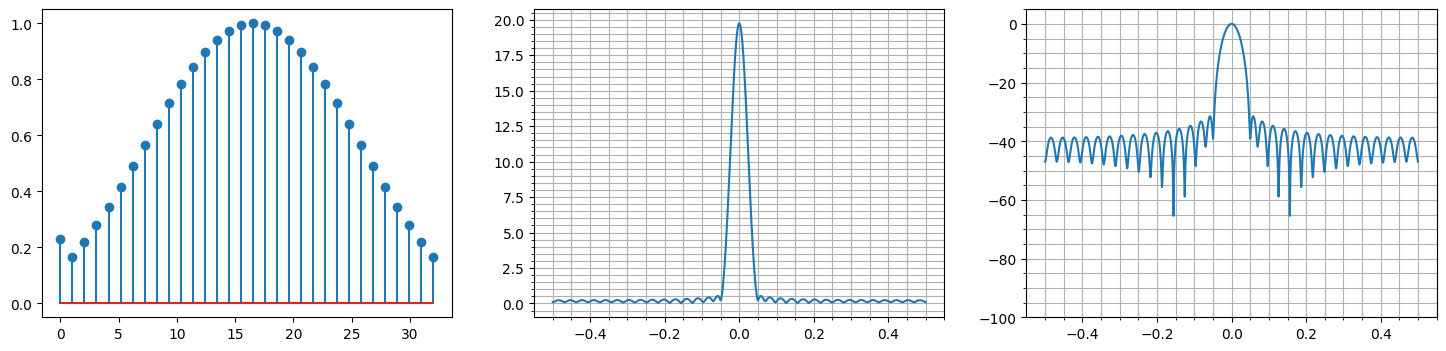

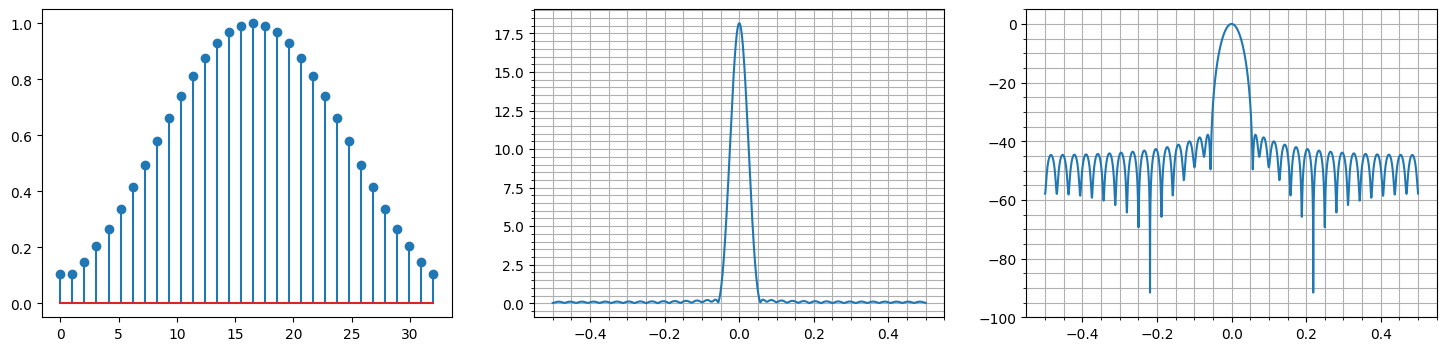

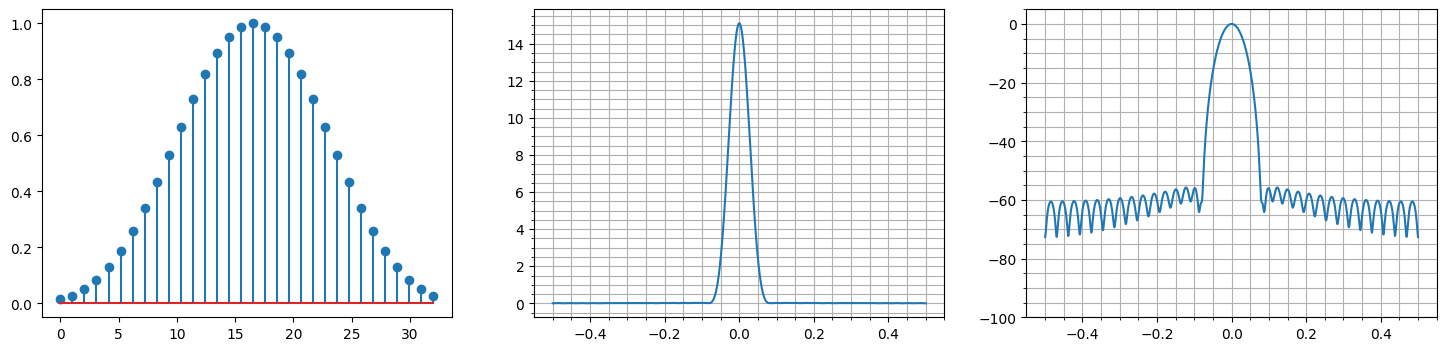

In [ ]:
def cheb (N, t, dB = 0, a = 1):
    if t < N and t >= 0:
        M = N + 1
        return a * (sp.signal.chebwin (M,dB))[t]
    else:
        return 0

drawFunc (32, cheb, 13.3)
drawFunc (32, cheb, 36)
drawFunc (32, cheb, 43)
drawFunc (32, cheb, 63)

## Задача 2.4. Различимость спектральных компонент.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11 | 15 | 18 | 17 | 32 | 48 | 15 | 18 | 47 | 32 | 40 | 38 |
|$\beta_0$| 1.1| 1.5 | 1.2 | 1.5 | 1.1 | 1.3 | 1.1 | 1.4 | 1.5 | 1.3 | 1.2 | 1.1 |
|$\beta_1$| 5 | 5.5 | 6.2 | 5.7 | 6.1 | 4.9 | 5.1 | 5.7 | 6 | 5.8 | 5.7 | 5.5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) окном Кайзера с параметром $\beta=\beta_0.$,

 б) окном Кайзера с параметром $\beta=\beta_1.$
 
 в) окном Блэкмана.
 
Значения параметров $n_0$ и $\beta=\beta_1$ определите из таблицы. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков оконной функции на результат спектрального анализа? 


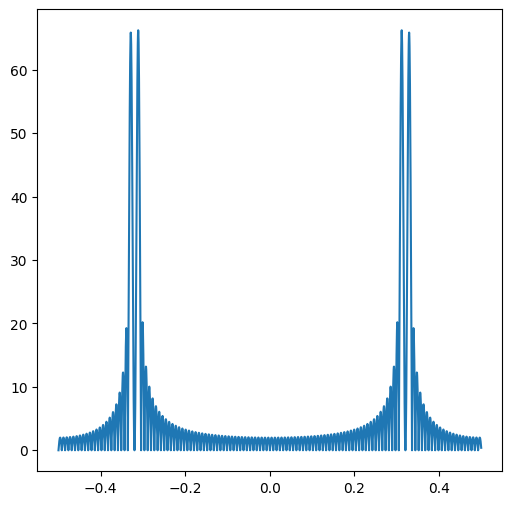

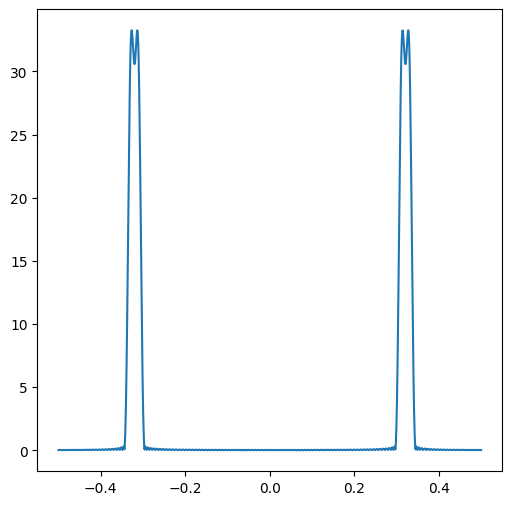

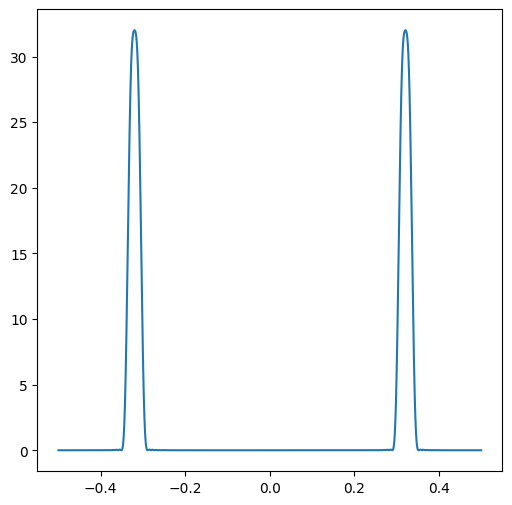

In [ ]:
n0 = 40
b0 = 1.2
b1 = 5.7

karr = np.linspace (0, 2048, 2048, dtype=np.int32)
xarr = np.cos (2*np.pi*n0*karr/128) + np.cos (2*np.pi*(n0+2)*karr/128)

y1arr = np.zeros (2048)
for i in range (2048):
    y1arr[i] = xarr[i] * kaiser (128, i, b0)
y1arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y1arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 2048), y1arr)

y2arr = np.zeros (2048)
for i in range (2048):
    y2arr[i] = xarr[i] * kaiser (128, i, b1)
y2arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y2arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 2048), y2arr)

y3arr = np.zeros (2048)
for i in range (2048):
    y3arr[i] = xarr[i] * blackman (128, i)
y3arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y3arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 2048), y3arr)


## Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Бартлетта | Ханна | Хэмминга | Ханна | Бартлетта | Хэмминга |
| $m_2$ |    -2     |     2    |   -2    |     2    |   -2    |     2    |
| $m_3$ |     4     |     6    |    3    |     4    |    5    |     7    |


| Варианты: |       7      |     8     |         9        |      10     |        11       |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Хэмминга | Ханна | Бартлетта | Ханна | Хэмминга | Бартлетта |
| $m_2$ |      2     |   -2    |     2    |   -2    |     2    |   -2    |
| $m_3$ |      7     |    3    |    -3    |   -4    |     5    |    4    |

Сгенерировать последовательность отсчетов гармонического сигнала $x[k]$ длительностью $N=64$, которая может быть описана следующей формулой:
$$x[k]=a_1 \sin\left(2\pi k \frac{n}{N}\right) + a_2 \cos\left(2\pi k \frac{n+m_2}{N}\right) - a_3\sin\left(2\pi k \frac{n+m_3}{N}\right),$$
где $a_1 = n = n_\text{v}+10$ ($n_\text{v}$ — номер вашего варианта), $a_2 = \dfrac{a_1}{6}$, $a_3 = \dfrac{a_1}{2}$, $m_2$  и  $m_3$  значения из таблицы, соответствующие вашему варианту.

* Построить ДВПФ $x[k]$, применив прямоугольное окно. Сколько гармонических компонент можно выделить?

* Построить ДВПФ $x[k]$, применив окно Блэкмана. Какие гармонические компоненты наблюдаются теперь?

* Построить ДВПФ $x[k]$, используя окно $w_1[k]$ из вашего варианта. Получилось ли пронаблюдать все гармонические компоненты?

* Подобрать коэффициенты для окон Чебышева и Кайзера так, чтобы возможно было наблюдать все гармонические компоненты. Построить соответствующие графики.**

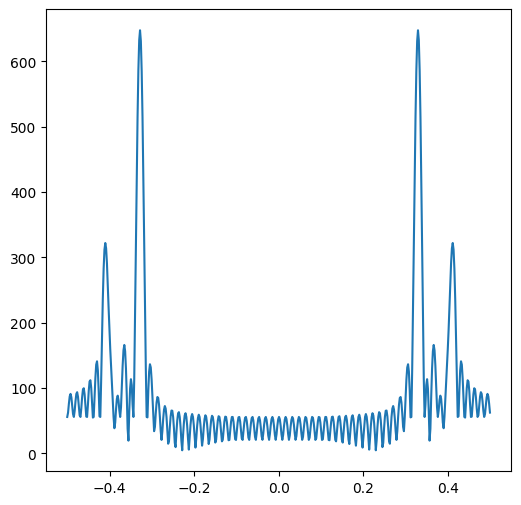

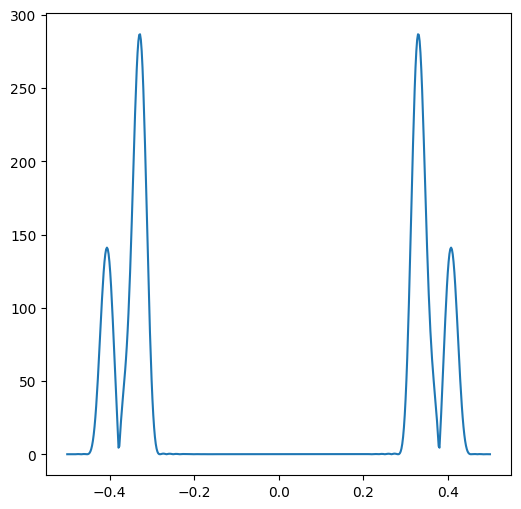

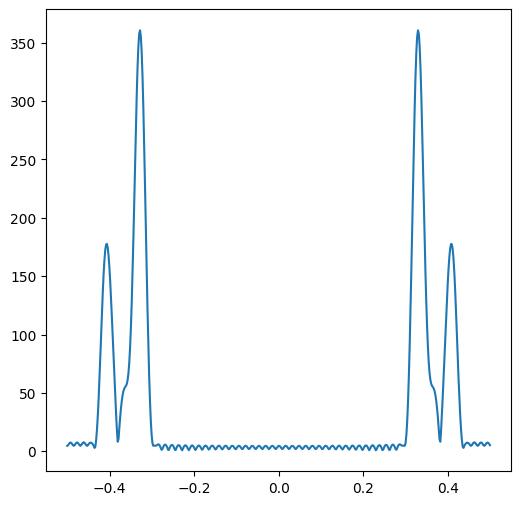

In [ ]:
m2 = 2
m3 = 5
n = 21
a2 = n/6
a3 = n/2
N = 64

karr = np.linspace (0, N, N, dtype=np.int32)
xarr = n* np.cos (2*np.pi*n*karr/N) + a2*np.cos (2*np.pi*(n+m2)*karr/N)  + a3*np.cos (2*np.pi*(n+m3)*karr/N)
xarr = np.append (xarr, np.zeros (7*N))

y1arr = np.zeros (8*N)
for i in range (8*N):
    y1arr[i] = xarr[i] * boxcar (N, i)
y1arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y1arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 8*N), y1arr)

y2arr = np.zeros (8*N)
for i in range (8*N):
    y2arr[i] = xarr[i] * blackman (N, i)
y2arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y2arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 8*N), y2arr)

y3arr = np.zeros (8*N)
for i in range (8*N):
    y3arr[i] = xarr[i] * hamming (N, i)
y3arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y3arr)))
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, 8*N), y3arr)

## Задача 2.6. Амплитудная модуляция спектра.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11,5 | 15,5 | 18,5 | 17,5 | 32,5 | 48,5 | 15,5 | 18,5 | 47,5 | 32,5 | 40,5 | 38,5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=128$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) прямоугольным окном (`boxcar`),

 б) окном с плоской вершиной (`flattop`).
 
 
Значение параметра $n_0$ определите из таблицы. Отнормируйте ДПФ на значение АЧХ оконной функции на нулевой частоте ($W(0)=\sum_{k=0}^{N-1} w[k]$). Для двух окон сравните амплитуду гармоники с модулем ближайших к ней отсчетов ДПФ.

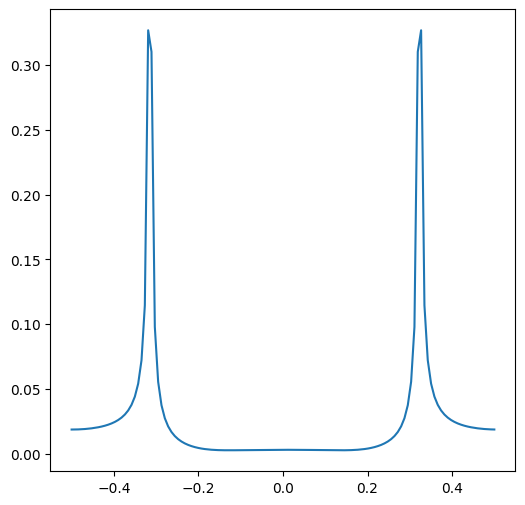

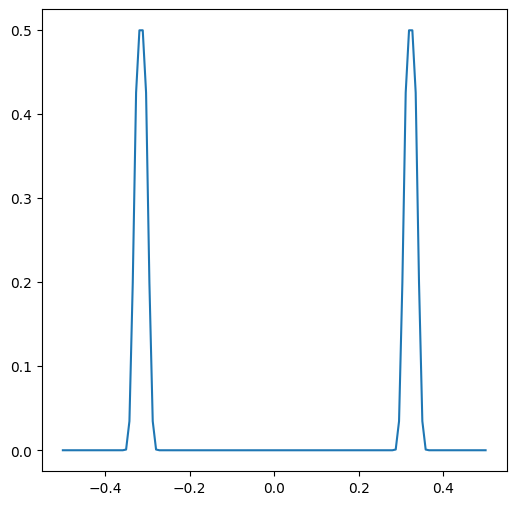

In [ ]:
N = 128
n0 = 40.5

karr = np.linspace (0, N, N, dtype=np.int32)
xarr = np.cos (2*np.pi*n0*karr/N)

y1arr = np.zeros (N)
s = 0
for i in range (N):
    y1arr[i] = xarr[i] * boxcar (N, i)
    s += boxcar (N, i)
y1arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y1arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, N), y1arr)

y2arr = np.zeros (N)
s = 0
for i in range (N):
    y2arr[i] = xarr[i] * flattop (N, i)
    s += flattop (N, i)
y2arr = np.absolute(sp.fft.fftshift( sp.fft.fft (y2arr))) / s
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.plot (np.linspace (-0.5, 0.5, N), y2arr)

# Занятие 3. Кратковременное дискретное преобразование Фурье (STFT) 

## Задача 3.1. Спектрограмма аудиофайла.  

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'clarinet_minor.wav' | 'clarinet_major32.wav'| 'major_scale_flute1.wav' | 'major_scale_flute2.wav'|'major_scale_flute3.wav' | 'major_scale_flute4.wav'|

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'major_scale_flute5.wav'|'major_scale_piano2.wav'|'major_scale_piano3.wav'|'single_notes.wav'|'violin_natural_minor.wav'|'violin_natural_minor_up.wav'|


Вычислите кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле Вашего варианта. Изобразите спектрограмму сигнала. Длину окна (размер кадра), тип оконной функции, число точек в перекрытии, масштабы осей и размерность ДПФ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равен размер кадра в секундах и как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте у данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,

* б) длина окна,

* в) размерность ДПФ (за счет дополнения нулевыми отсчетами)?


windows size (seconds): 0.17066666666666666
time resolution (seconds): 0.128
frequency resolution (Hz): 2.9296875


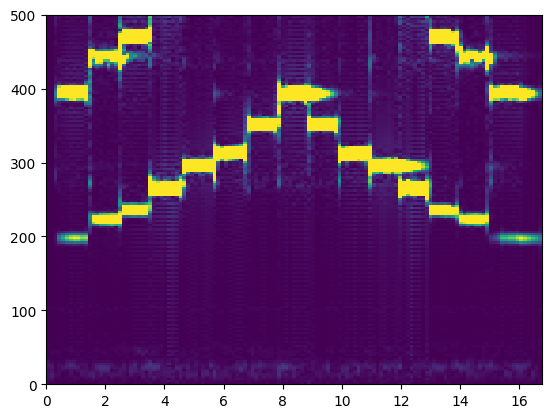

In [ ]:
samplerate, data = sp.io.wavfile.read ('violin_natural_minor.wav')

M = 8192
R = 6144
window = hamming
N = 16384

data = data[0:data.shape[0]//R * R]

print ('windows size (seconds):', M/samplerate)
print ('time resolution (seconds):', R/samplerate)
print ('frequency resolution (Hz):', samplerate/N)

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 500)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')

## Задача 3.2. Спектрограмма ЛЧМ сигнала. 

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0$, Гц | 170| 80 | 90 | 75 | 120 | 130 | 85 | 95 | 70 | 65 | 110 | 105 |
|$f_1$, Гц | 800 | 900 | 850 | 870 | 820 | 875 | 780 | 810 | 790 | 825 | 830 | 840 |

Постройте спектрограмму c окном Блэкмана для ЛЧМ-сигнала длительностью $T=2$ секундам, мгновенная частота которого изменяется от $f_0$ до $f_1$, частота дискретизации $f_s=2000$ Гц. Начальный размер кадра (`nperseg`) выберите $H=512$ отсчетов. Пронаблюдайте, как изменяется спектрограмма при изменении следующих параметров:
* тип оконной функции (`window`),
* длина кадра (`nperseg`),
* размерность ДПФ (`nfft`).

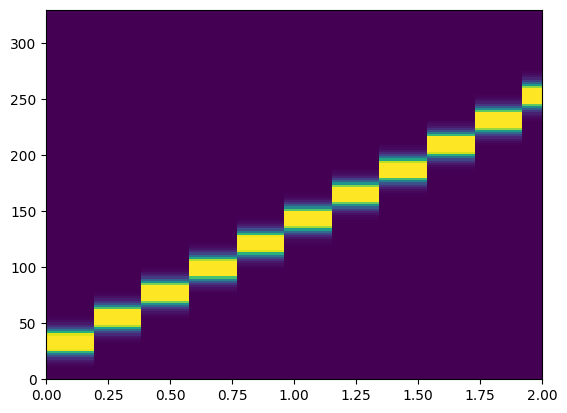

In [ ]:
window = blackman
nperseg = 512
nfft = 1024
samplerate = 2000

f0 = 110
f1 = 830
tarr = np.arange (0, 3, 1/2000)
data = np.sin ((f0 + (f1 - f0) / 2 * tarr) * tarr)

M = nperseg
R = nperseg // 4 * 3
N = nfft

data = data[0:data.shape[0]//R * R]

spec = np.absolute(sp.fft.fftshift (sp.fft.fft (np.append (data[0:M], np.zeros (N-M)))))
freqtable = np.ndarray ((data.shape[0]//R + 1, N))
wind = np.zeros (N)
for i in range(N):
    wind[i] = window (M, i)
for i in range (0, data.shape[0], R):
    freqtable[i//R, :] = np.absolute(sp.fft.fftshift (sp.fft.fft (wind[:] * np.append (data[i:i+M], np.zeros (N-data[i:i+M].shape[0])))))
fig, ax = plt.subplots(1, 1)

freqtable = freqtable.transpose ()

ax.set_ylim (0, 330)
ax.set_xlim (0, 2)

ax.pcolormesh(np.arange (0, data.shape[0] + R, R) / samplerate, 
              np.arange (-0.5, 0.5, 1/N) * samplerate, 
              freqtable[:-1, :-1], vmin=np.max(freqtable)/5000, vmax=np.max(freqtable)/25, shading='flat')